CNN using finger component rotations and location

In [1]:
# Seed value
seed_value = 1

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
seed_value += 1

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
seed_value += 1

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
seed_value += 1

# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical
from utils.parseData import GetData

In [3]:
fileNames = 'comp_rot_and_loc'
path = "./data/"
labels, data = GetData(path=path, augment=False, loc=True, w_space=False)

df = pd.DataFrame(data) # for visualising
df

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
0,-1.049652,-2.00693,-1.15541,122.989521,5.031775,32.396511,-3.140017,-3.333338,-1.373387,154.947733,...,-1.868432,-96.587422,-79.767570,-67.930081,1.998069,-5.273777,-2.175768,-70.781021,-70.997175,-87.361629
1,-1.049652,-2.00693,-1.15541,135.335277,22.762292,47.132208,-2.608716,-3.686575,-2.116977,171.382518,...,0.286078,78.789987,5.173831,90.525847,5.841685,-14.368368,0.412673,72.386893,-4.364089,104.625646
2,-1.049652,-2.00693,-1.15541,141.891296,28.615349,54.489470,-2.316895,-3.782848,-2.345666,-178.385441,...,-1.170839,76.610167,22.542002,89.209393,6.495834,-14.018856,0.524502,73.080910,-3.183434,110.232384
3,-1.049652,-2.00693,-1.15541,141.153613,28.042486,53.670653,-2.349130,-3.774056,-2.323794,-179.465062,...,0.336041,79.618323,-2.325866,93.411176,6.155940,-14.150519,0.914465,73.203217,-12.320351,108.900585
4,-1.049652,-2.00693,-1.15541,123.134389,5.315064,32.581669,-3.134786,-3.339489,-1.385625,155.111402,...,-2.054653,-94.026793,-73.783497,-70.421552,2.007080,-4.987189,-2.225246,-73.377815,-68.075547,-86.260239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.049652,-2.00693,-1.15541,144.559904,30.531501,57.436467,-2.201837,-3.811081,-2.417950,-175.972231,...,-4.337216,-87.475319,-29.036467,-69.979212,1.400962,-5.391978,-3.374288,-78.152468,-38.457951,-68.814650
396,-1.049652,-2.00693,-1.15541,122.329051,3.709277,31.546372,-3.163193,-3.304464,-1.316191,154.015381,...,-1.898560,-93.659364,-71.270047,-67.264441,4.784603,-12.551007,-6.733853,62.027796,51.356863,99.237729
397,-1.049652,-2.00693,-1.15541,124.592251,8.038458,34.421333,-3.079604,-3.397978,-1.502942,156.804631,...,-4.131485,-88.473434,-30.455098,-71.664444,4.426155,-13.864480,-5.277959,67.206452,33.679707,95.859042
398,-1.049652,-2.00693,-1.15541,144.822964,30.707851,57.725794,-2.190632,-3.813582,-2.424533,-174.122997,...,-2.671244,-90.323664,-60.710699,-70.750265,1.714864,-5.393832,-2.557039,-75.846721,-59.326100,-76.396320


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=2, stratify=labels)

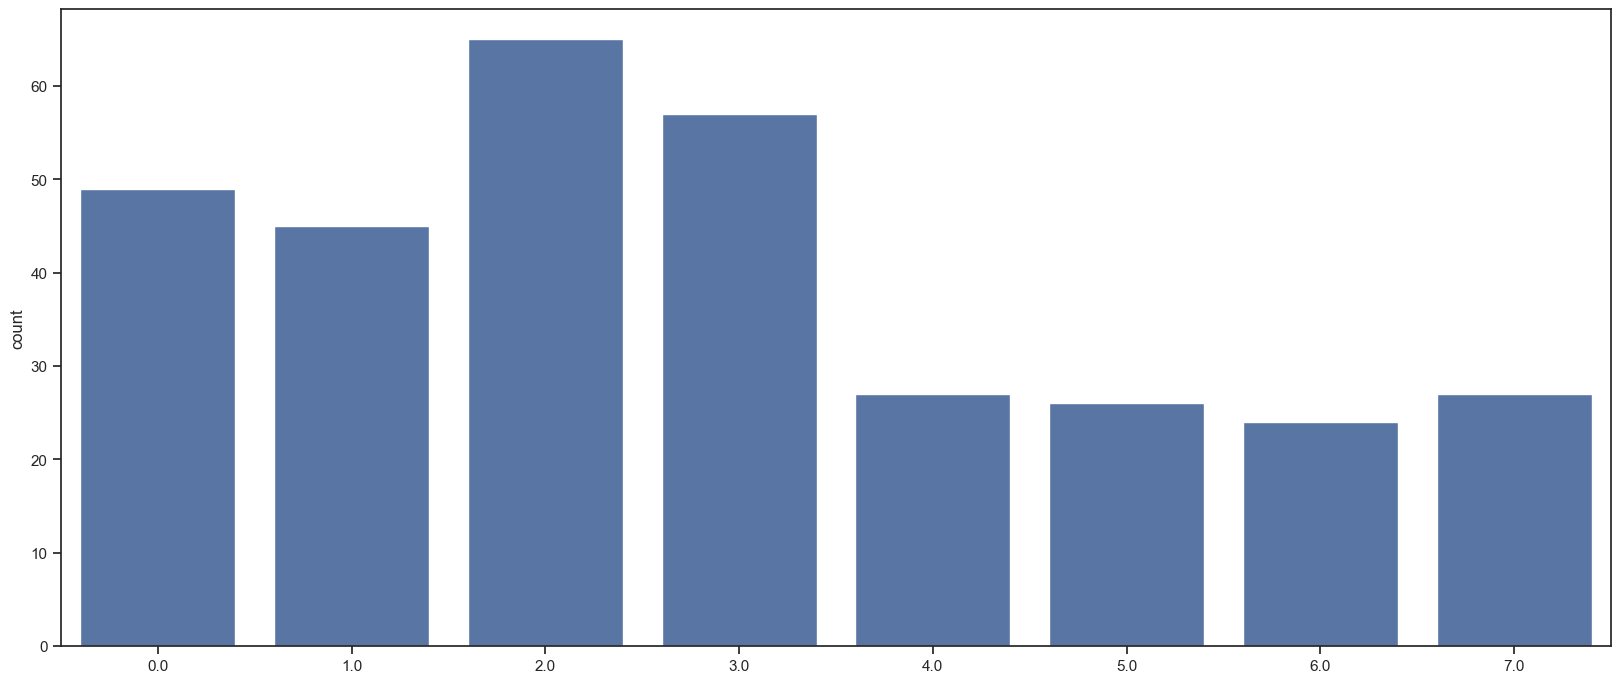

In [5]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.set_style("ticks")
sns.color_palette("hls", 8)
cat = sns.countplot(x=y_train.reshape(-1))

In [6]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("")
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (320, 132)
y_train shape: (320, 1)

X_test shape: (80, 132)
y_test shape: (80, 1)


Changing labels shape to categorical: 

In [7]:
y_train[0]

array([3.])

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

y_train shape: (320, 8)
y_test shape: (80, 8)


In [11]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [12]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (320, 132, 1)
X_test shape: (80, 132, 1)


In [13]:
class_mapping = ['thumbs_up','thumbs_down','ok','victory', 'horns', 'phone', 'one', 'point']
num_classes = 8

#2. Creating and training CNN

In [14]:
import keras
from keras import layers  
from keras import models
from keras import callbacks
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [15]:
def create_1D_model():
  model = models.Sequential()

  model.add(layers.Conv1D(32, 3, input_shape=X_train.shape[1:3], activation='relu', ))
  model.add(layers.Conv1D(16, 1, activation='relu', ))
  model.add(layers.Dropout(0.2))
  model.add(layers.MaxPooling1D(pool_size=2))

  model.add(layers.Flatten())

  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(num_classes, activation='softmax'))

  return model

In [16]:
model = create_1D_model()
model.compile(optimizer=keras.optimizers.SGD(),loss='categorical_crossentropy',metrics=['accuracy', 'Precision', 'Recall'])

In [17]:
MCP = keras.callbacks.ModelCheckpoint('./results/' + 'model_' + fileNames + '.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [18]:
history = model.fit(X_train, y_train, batch_size=32,epochs=100, validation_data=(X_test, y_test),callbacks=[MCP,ES,RLP],verbose=1)

Epoch 1/100




 1/10 [==>...........................] - ETA: 5s - loss: 24.5620 - accuracy: 0.0938 - precision: 0.0938 - recall: 0.0938
Epoch 1: val_accuracy improved from -inf to 0.71250, saving model to ./results\model_comp_rot_and_loc.h5
10/10 [==============================] - 1s 23ms/step - loss: 10.5550 - accuracy: 0.4125 - precision: 0.4414 - recall: 0.3063 - val_loss: 0.5952 - val_accuracy: 0.7125 - val_precision: 0.7812 - val_recall: 0.6250 - lr: 0.0100
Epoch 2/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.8044 - accuracy: 0.6875 - precision: 0.7692 - recall: 0.6250
Epoch 2: val_accuracy improved from 0.71250 to 0.83750, saving model to ./results\model_comp_rot_and_loc.h5
10/10 [==============================] - 0s 5ms/step - loss: 0.7080 - accuracy: 0.7656 - precision: 0.8111 - recall: 0.6844 - val_loss: 0.4361 - val_accuracy: 0.8375 - val_precision: 0.8182 - val_recall: 0.6750 - lr: 0.0100
Epoch 3/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.4895 - accura

d:\Repositories\python-workspaces\deep-learning-tests\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 5: val_accuracy improved from 0.85000 to 0.86250, saving model to ./results\model_comp_rot_and_loc.h5
10/10 [==============================] - 0s 5ms/step - loss: 0.3071 - accuracy: 0.8750 - precision: 0.8842 - recall: 0.8594 - val_loss: 0.3029 - val_accuracy: 0.8625 - val_precision: 0.8590 - val_recall: 0.8375 - lr: 0.0100
Epoch 6/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.4304 - accuracy: 0.8125 - precision: 0.8125 - recall: 0.8125
Epoch 6: val_accuracy improved from 0.86250 to 0.98750, saving model to ./results\model_comp_rot_and_loc.h5
10/10 [==============================] - 0s 5ms/step - loss: 0.2323 - accuracy: 0.9156 - precision: 0.9233 - recall: 0.9031 - val_loss: 0.0849 - val_accuracy: 0.9875 - val_precision: 0.9873 - val_recall: 0.9750 - lr: 0.0100
Epoch 7/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.1478 - accuracy: 0.9375 - precision: 0.9375 - recall: 0.9375
Epoch 7: val_accuracy did not improve from 0.98750
10/10 [=============

#3. CNN evaluation

In [19]:
model.evaluate(X_test, y_test, verbose=2)

3/3 - 0s - loss: 0.0794 - accuracy: 1.0000 - precision: 1.0000 - recall: 0.9875 - 15ms/epoch - 5ms/step


[0.07936815917491913, 1.0, 1.0, 0.987500011920929]

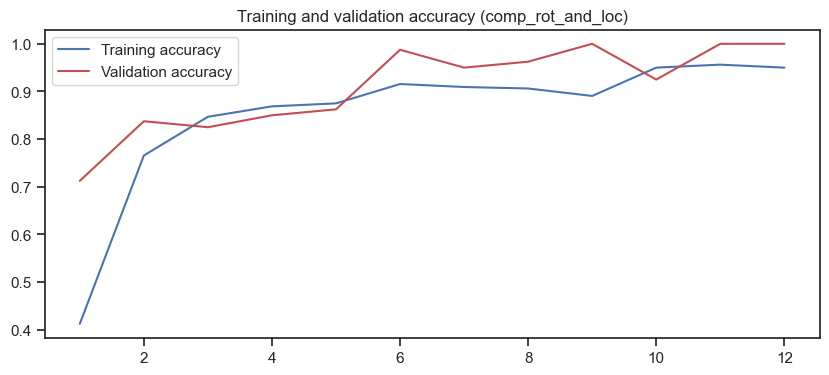

<Figure size 2000x827 with 0 Axes>

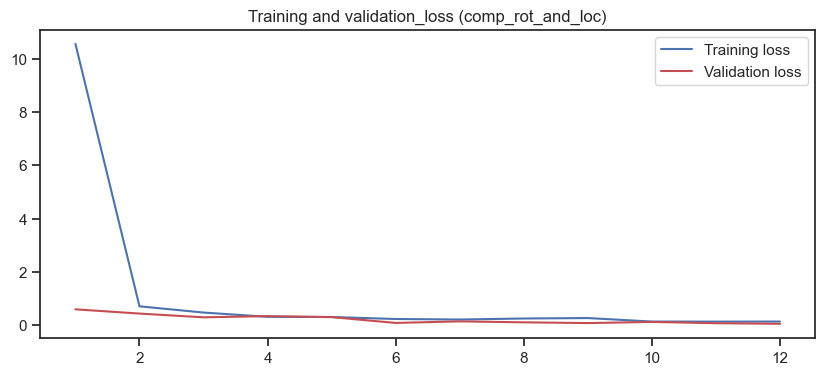

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 4))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy (' + fileNames + ')')
plt.legend() 
plt.savefig('./results/acc_' + fileNames + '.png',dpi=200)
plt.figure()

plt.figure(figsize=(10, 4))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation_loss (' + fileNames + ')')
plt.savefig('./results/loss_' + fileNames + '.png',dpi=200)
plt.legend()
plt.show()

In [21]:
predictions = np.argmax(model.predict(X_test), axis=1)
actual = np.argmax(y_test, axis=1)

3/3 [==============================] - 0s 2ms/step


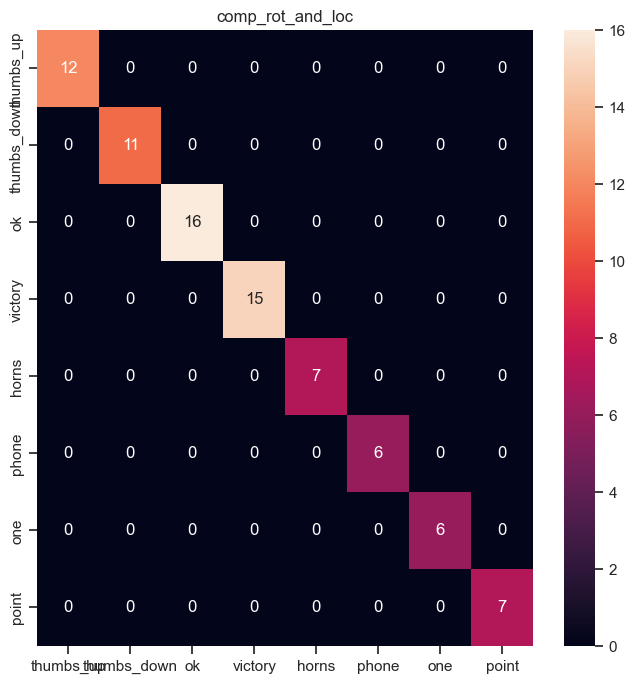

In [22]:
plt.figure(figsize=(8, 8))
cm = confusion_matrix(actual, predictions)
g = sns.heatmap(cm, annot=True, fmt='.0f')
g.set_xticklabels(class_mapping)
g.set_yticklabels(class_mapping)
plt.title(fileNames)
plt.savefig('./results/confusion_' + fileNames + '.png',dpi=200)
plt.show()

In [23]:
y_test_temp = np.argmax(y_test, axis=1)
print(classification_report(y_test_temp, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         7

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

